# SciViz!

## 2. Using yt

In [1]:
import yt

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/jnaiman/.config/yt/ytrc is deprecated in favor of /Users/jnaiman/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


We'll use a dataset originally from the yt hub: http://yt-project.org/data/

Specifically, we'll use the IsolatedGalaxy dataset: http://yt-project.org/data/IsolatedGalaxy.tar.gz

Now, lets grab a dataset & upload it.  Here's where mine is stored (in data):

In [2]:
ds = yt.load("/Users/jnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2022-04-24 11:46:00,896 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-04-24 11:46:00,897 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-04-24 11:46:00,898 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-24 11:46:00,899 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-24 11:46:00,899 Parameters: cosmological_simulation   = 0


Print out various stats of this dataset:

In [3]:
ds.print_stats()

Parsing Hierarchy : 100%|████████████████████████████████████████████████████| 173/173 [00:00<00:00, 13920.40it/s]
yt : [INFO     ] 2022-04-24 11:46:02,101 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc Mpc
	Width: 1.221e+02 pc pc
	Width: 2.518e+07 AU AU
	Width: 3.767e+20 cm cm


This is basically telling us something about the number of data points in the dataset. Don't worry if you don't know what levels, grids or cells are at this point we'll get to it later.

Same thing with field list, its cool if some of these look less familiar then others:

In [4]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [5]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'pa

This is a 3D simululation of a galaxy, lets check out some stats about the box:

In [6]:
ds.domain_right_edge, ds.domain_left_edge

(unyt_array([1., 1., 1.], 'code_length'),
 unyt_array([0., 0., 0.], 'code_length'))

What this is saying is the box goes from (0,0,0) to (1,1,1) in "code_length" units.  Basically, this is just a normalized box.

You can also do fun things like print out max & min densities:

In [7]:
ds.r[:].max("density"), ds.r[:].min("density")

(unyt_quantity(7.73426504e-24, 'g/cm**3'),
 unyt_quantity(8.47293751e-32, 'g/cm**3'))

The above is for the whole box.

We can also ask where the maximum density is in this simulation box:

In [8]:
ds.r[:].argmax("density")

(unyt_quantity(0.50408936, 'code_length'),
 unyt_quantity(0.49981689, 'code_length'),
 unyt_quantity(0.50018311, 'code_length'))

So this gives us x/y/z positions for where the maximum density is.

Ok, lets make a quick plot 1/2 down the z-direction. 

yt : [INFO     ] 2022-04-24 11:46:07,975 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:07,975 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:07,978 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-24 11:46:08,096 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



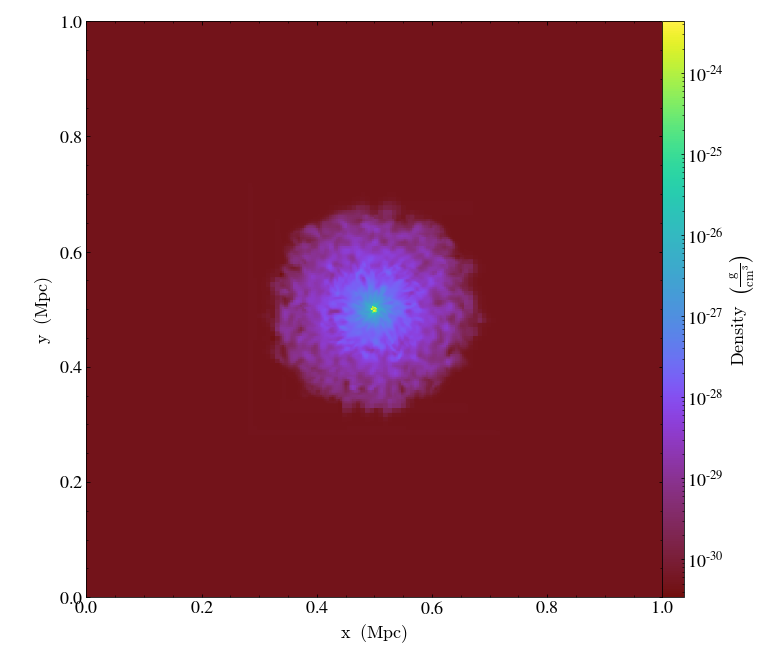

In [9]:
# if the plot is too big for class try:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]


p = ds.r[:, :, 0.5].plot("density")

Let's zoom:

yt : [INFO     ] 2022-04-24 11:46:09,243 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-24 11:46:09,254 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



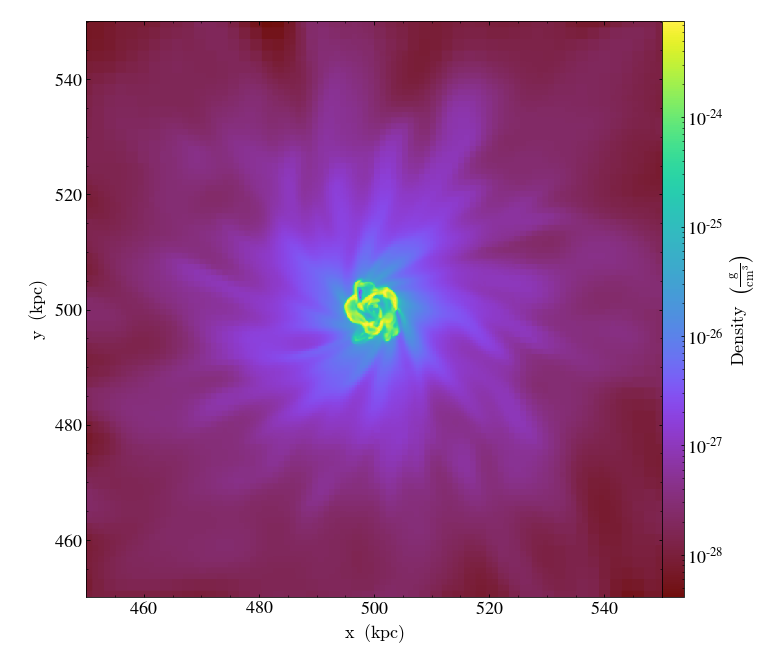

In [10]:
p.zoom(10)

So, unless you're an astronomer you might be a little confused about these "kpc" units. But yt allows us to change them!  Behold cool yt units things:

In [11]:
yt.units.kpc.get_cgs_equivalent()

cm

So we have now changed these weird kpc units.

yt also can do cool things with units like, `yt.units` figures out some math stuff like, making things into cubed cm:

In [12]:
(yt.units.kpc**3).get_cgs_equivalent()

cm**3

So let's set some units of our plot!  Let's change the units of density from $g/cm^3$ to $kg/m^3$


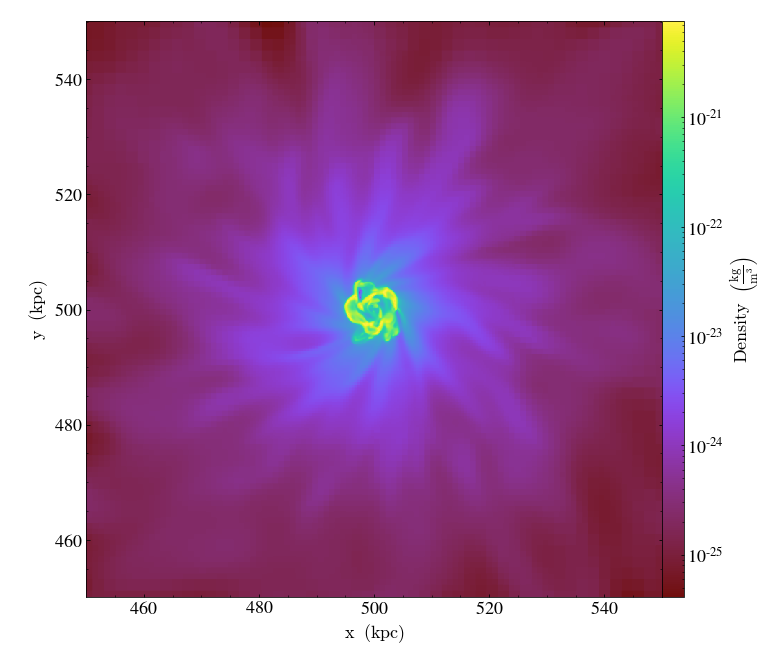

In [13]:
p.set_unit("density","kg/m**3")

We can also include annotations on this plot:


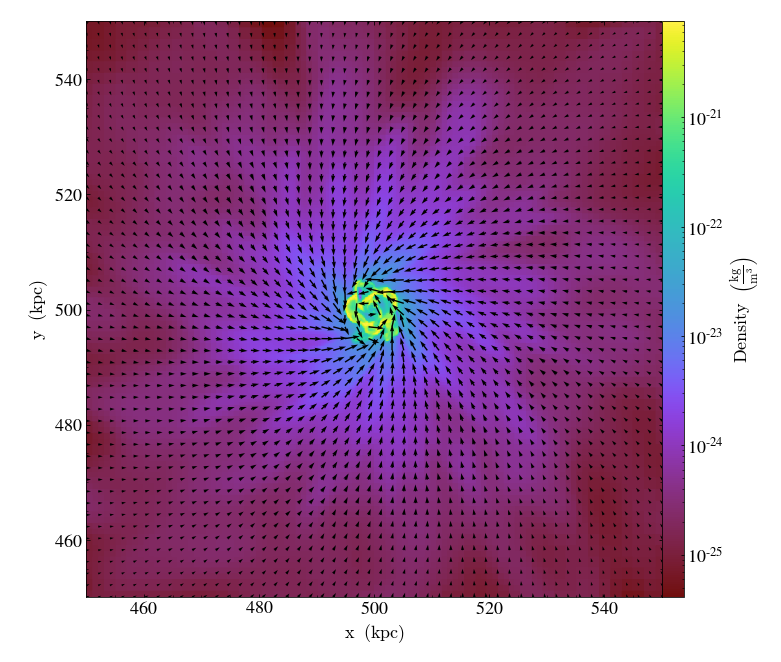

In [14]:
p.annotate_velocity()

This shows how material is moving in this simulation this is shown with velocity vectors.

We can combine some of our coding around finding max values of density and combine with some region plots.

Let's project the maximum density along the z axis i.e. lets make a plot of the maximum density along the z-axis of our plot:

yt : [INFO     ] 2022-04-24 11:46:15,742 Projection completed
yt : [INFO     ] 2022-04-24 11:46:15,743 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:15,743 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:15,745 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



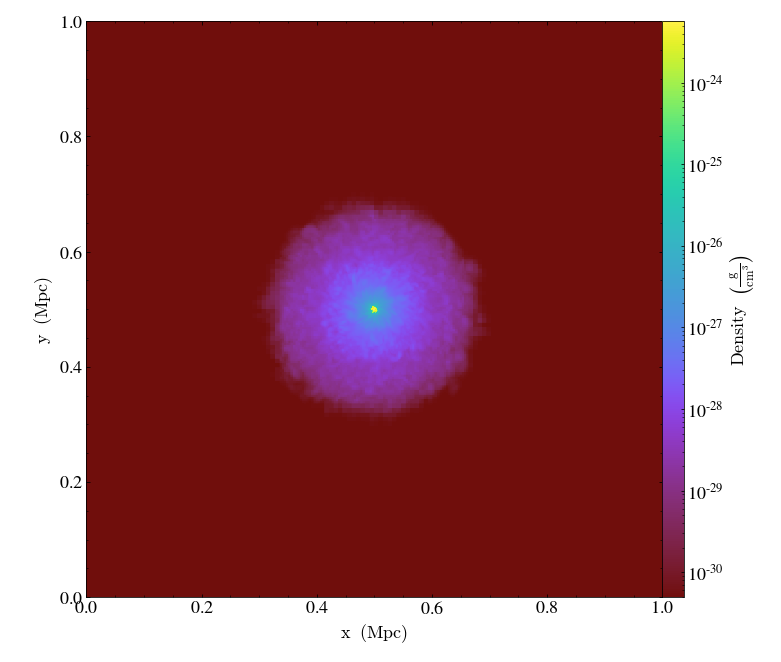

In [15]:
p2 = ds.r[:].max("density", axis="z").plot()

We can zoom this as well:


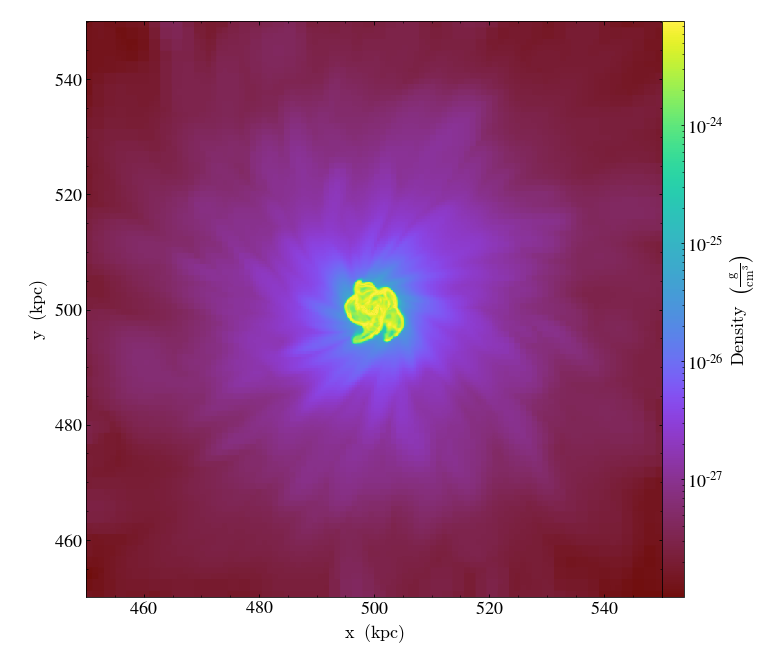

In [16]:
p2.zoom(10)

If we scroll back up we can see that there is indeed a different between this and our slice plot.  Here, we are much more "smeared" since we're picking only the max density $\rightarrow$ everything looks brighter.

We can also do plots based on region selection but over specific values of z (and x & y). If we recall our box goes from 0$\rightarrow$1 in each x/y/z direction, we can plot a zoom in like so:

yt : [INFO     ] 2022-04-24 11:46:18,409 Projection completed
yt : [INFO     ] 2022-04-24 11:46:18,410 xlim = 0.100000 0.900000
yt : [INFO     ] 2022-04-24 11:46:18,410 ylim = 0.100000 0.900000
yt : [INFO     ] 2022-04-24 11:46:18,412 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



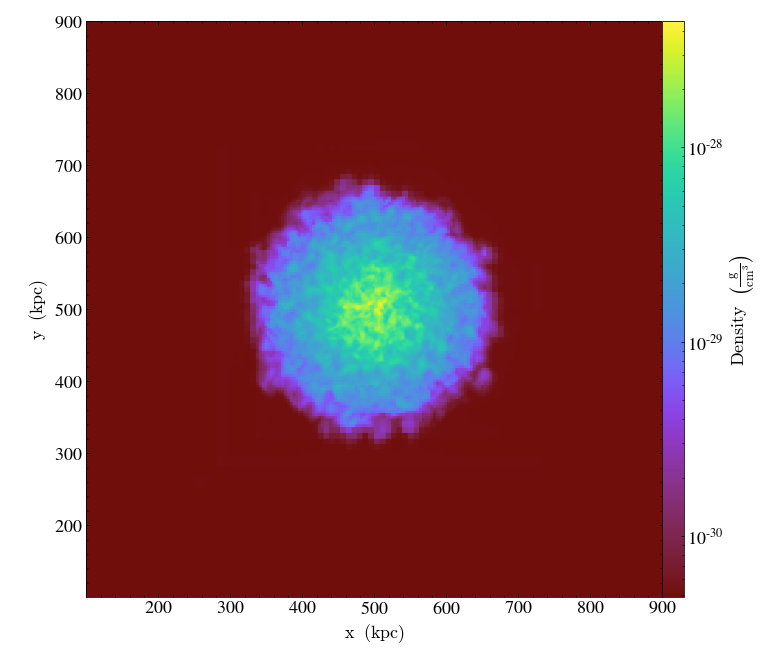

In [17]:
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].max("density", axis="z").plot()

So, this shows the maximum density but only in a thin slice of the z-axis which is offset from the center.

Since the galaxy lives at the center, and is the highest density gas region, it makes sense that our densities are lower and our features look different -- more "fuzzy ball" outside of the galaxy then gas flowing onto a galaxy disk.

Let's redo the same plot but for the temperature of the gas:

yt : [INFO     ] 2022-04-24 11:46:19,625 Projection completed
yt : [INFO     ] 2022-04-24 11:46:19,626 xlim = 0.100000 0.900000
yt : [INFO     ] 2022-04-24 11:46:19,627 ylim = 0.100000 0.900000
yt : [INFO     ] 2022-04-24 11:46:19,629 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



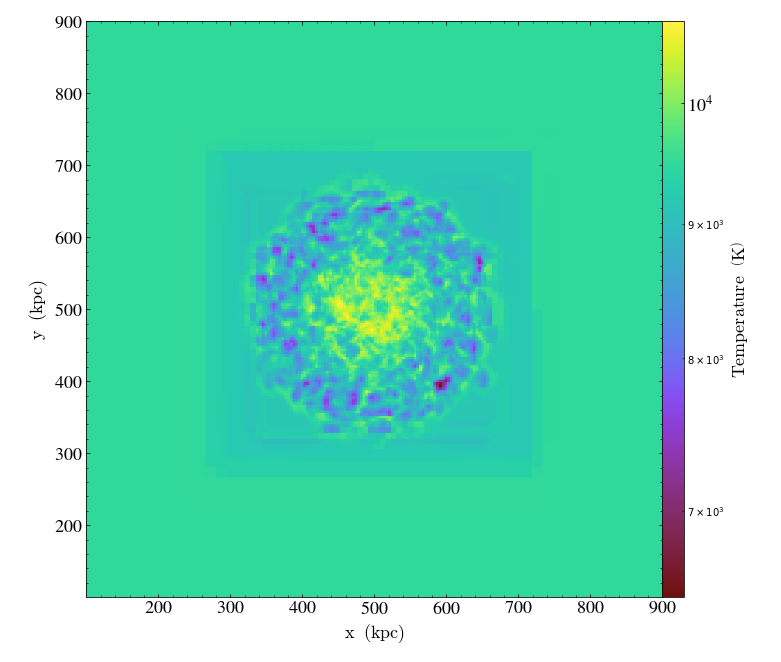

In [18]:
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].mean("temperature", axis="z").plot()

We might want to highlight the temperature of the most dense regions.  Why?  Well maybe we want to, instead of depicting the straight temperature, we want to depict the temperature of the *majority of the gas*. We can do this by specifying a "weight" in our projection:

yt : [INFO     ] 2022-04-24 11:46:20,845 Projection completed
yt : [INFO     ] 2022-04-24 11:46:20,846 xlim = 0.100000 0.900000
yt : [INFO     ] 2022-04-24 11:46:20,846 ylim = 0.100000 0.900000
yt : [INFO     ] 2022-04-24 11:46:20,848 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



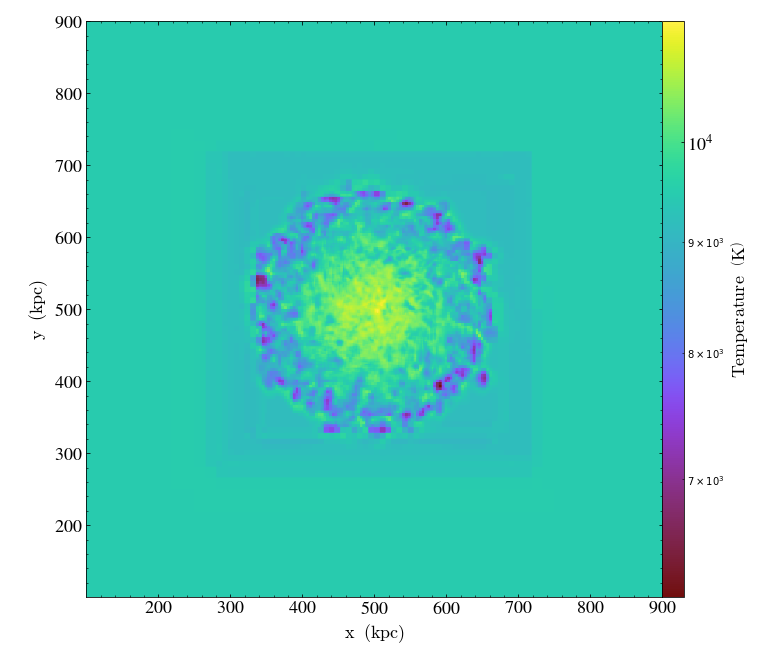

In [19]:
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].mean("temperature", weight="density", axis="z").plot()

So why is there this blocky structure?  In space, we don't see cubes around galaxies... yet anyway...

This is becuase this is a simulation of a galaxy, not an actual galaxy.  We can show why this might be by plotting the "grids" of this simulation over this thing:


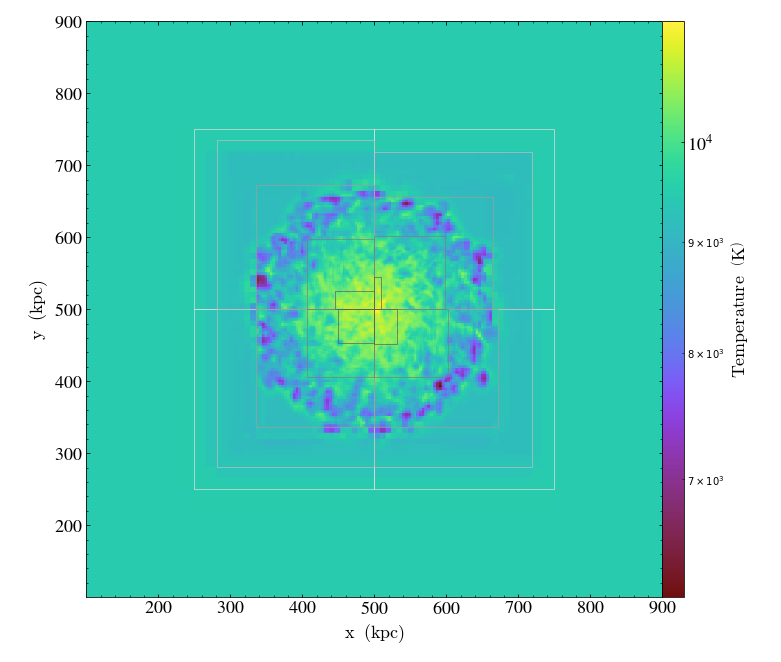

In [20]:
p.annotate_grids()

From this we can see that our grids sort of align where the temperature looks funny.  This is a good indicator that we have some numerical artifacts in our simulation.

Ok!  Let's try some more analysis-like plots some of the helpful yt included plots is:


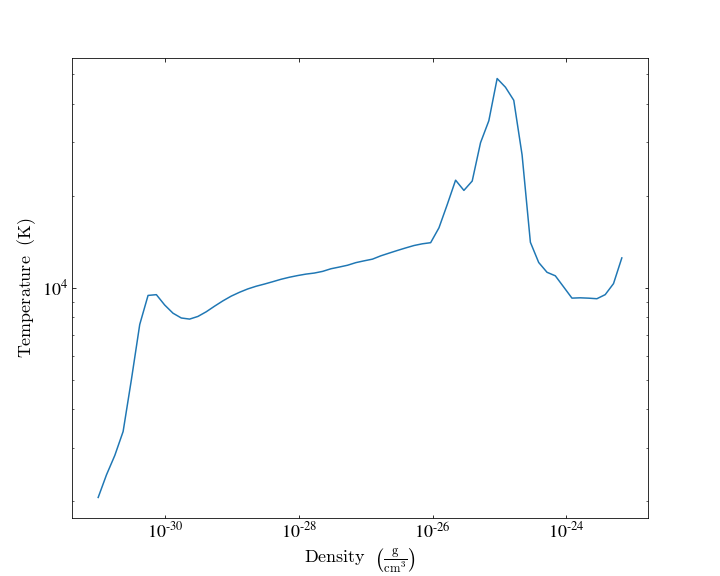

In [21]:
ds.r[:].profile("density", "temperature").plot()

So this is plotting the temperature of the gas in our simulation, in each binned density.

In our actual simulation, we have temperaturates at a variety of densities, and this is usually the case, so by default what is plotted is the temperature (our 2nd param) plotted at each density bin, but weighted by the mass of material (gas) in each cell.

We can weight by other things, like in this case density:


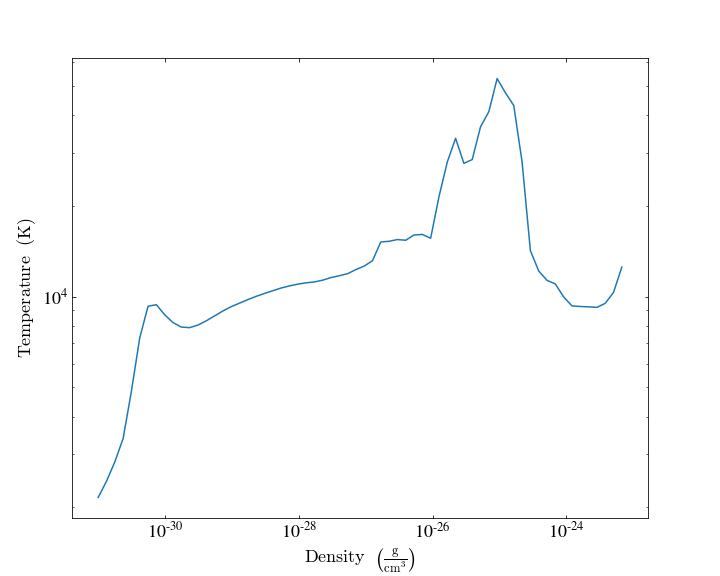

In [22]:
ds.r[:].profile("density", "temperature", weight_field="density").plot()

So, similar shape (since mass and density are related) but a little different.

# Activity #2: Brain data with yt

We can also use yt to play with other sorts of data:

In [23]:
import h5py # might have to pip install

Let's read our datafile into something called "scan_data":

In [24]:
with h5py.File("/Users/jnaiman/Downloads/single_dicom.h5", "r") as f:
    scan_data = f["/scan"][:]

If we recall, we had a weird shape of this data:

In [25]:
scan_data.shape

(36, 512, 512)

So to import this data into yt to have yt make images for us, we need to do some formatting with numpy:

In [26]:
import numpy as np

In [27]:
dsd = yt.load_uniform_grid({'scan': scan_data},
                     [36, 512, 512],
                     #length_unit = yt.units.centimeter, # specify the units of this dataset
                     bbox = np.array([[0., 10], [0, 10], [0, 10]]), # give a "size" to this dataset
)

yt : [INFO     ] 2022-04-24 11:46:31,712 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-24 11:46:31,713 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2022-04-24 11:46:31,714 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-24 11:46:31,715 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2022-04-24 11:46:31,716 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-04-24 11:46:33,579 Projection completed
yt : [INFO     ] 2022-04-24 11:46:33,580 xlim = 0.000000 10.000000
yt : [INFO     ] 2022-04-24 11:46:33,581 ylim = 0.000000 10.000000
yt : [INFO     ] 2022-04-24 11:46:33,582 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



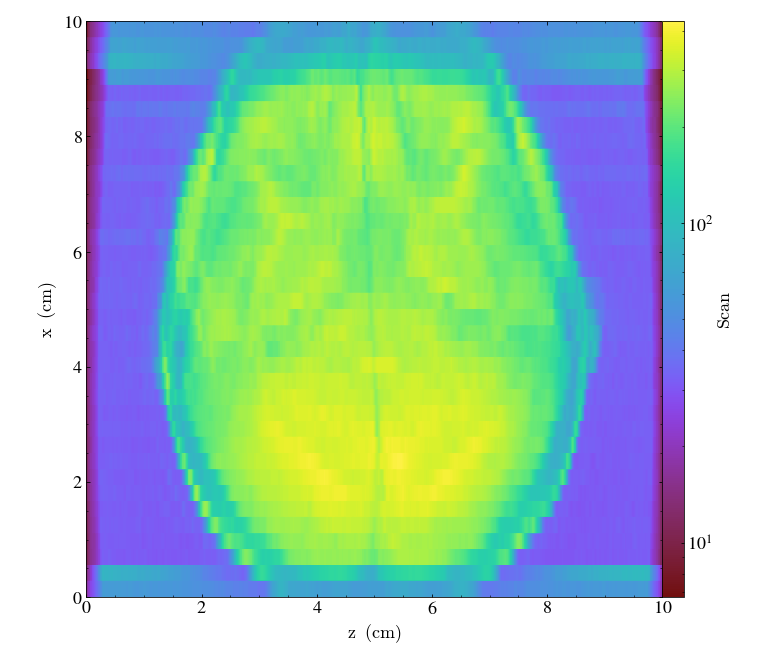

In [28]:
dsd.r[:].mean("scan", axis="y").plot(); # this takes the mean along the specified axis "y" and plots

Can also do .max or .min

Note here that the number of fields available is much less:

In [29]:
dsd.field_list

[('stream', 'scan')]

We can also look at different potions of the z-y axis by specifying the x-axis:

yt : [INFO     ] 2022-04-24 11:46:35,702 xlim = 0.000000 10.000000
yt : [INFO     ] 2022-04-24 11:46:35,704 ylim = 0.000000 10.000000
yt : [INFO     ] 2022-04-24 11:46:35,706 Making a fixed resolution buffer of (scan) 800 by 800
yt : [INFO     ] 2022-04-24 11:46:35,897 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



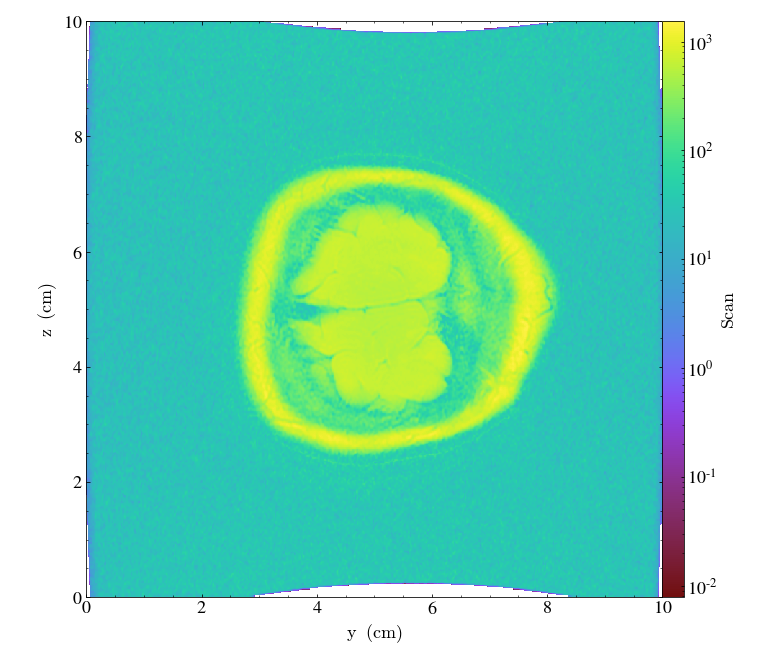

In [30]:
p = dsd.r[0.75,:,:].plot('scan')

# Activity #3: Output images and objects (3D) with yt
Note: we'll do more with 3D objects next week/the last week, but this is a good first view of some cool ways we can output objects with yt.

Let's go back to to our galaxy object and make a surface.

First, we'll cut down to a sphere and check that out:

yt : [INFO     ] 2022-04-24 11:46:37,314 max value is 7.73427e-24 at 0.5040893554687500 0.4998168945312500 0.5001831054687500
yt : [INFO     ] 2022-04-24 11:46:37,564 Projection completed
yt : [INFO     ] 2022-04-24 11:46:37,566 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:37,566 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:37,567 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



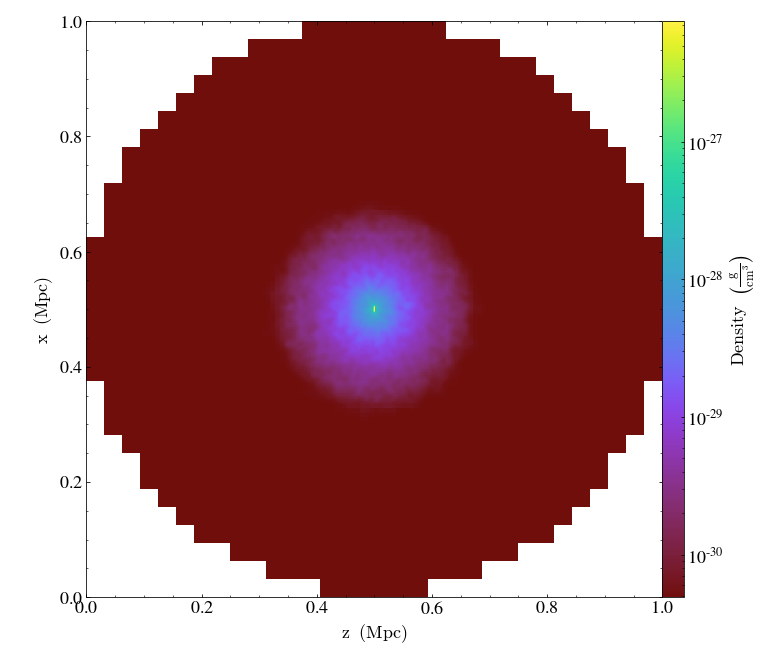

In [31]:
sphere = ds.sphere("max", (500.0, "kpc"))
sphere.mean("density", axis="y").plot(); # this takes the mean along the specified axis "y" and plots

Let's generate a surface of constant density i.e. we'll connect points on a surface where the density has a single value:

In [32]:
surface = ds.surface(sphere, "density", 1e-27)

In [33]:
surface.export_obj('/Users/jnaiman/Downloads/myGalFiles',color_field='temperature')
# the above might take a while

yt : [INFO     ] 2022-04-24 11:46:48,438 Extracting (sampling: ('gas', 'temperature'))


At this point you can upload this to SketchFab, or use PyGEL3D if you were able to install this.

# -----------------------------------------------------------------------

We **WON'T** be doing this from Spring 2021 and on, but its left here as a note for others.

#### If you have PyGEL3D installed:

In [ ]:
# for checking out our surfaces right here
#http://www2.compute.dtu.dk/projects/GEL/PyGEL/
#!pip install PyGEL3D

# you might have to link where pip installs things
# you can find this in your activated DataViz environment with `pip show PyGEL3D`
from sys import path
path.append('/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/')

In [ ]:
from PyGEL3D import gel
from PyGEL3D import js

# for navigating

js.set_export_mode()
m = gel.obj_load("/Users/jillnaiman/Downloads/myGalFiles.obj")
viewer = gel.GLManifoldViewer()
viewer.display(m)



# press ESC to quit?  Yes, but then it takes a while so

In [ ]:
# to get rid of the window
del viewer

Now, lets try with an inline viewer -- also display in the notebook:

In [ ]:
import numpy as np # if you haven't yet

#js.display(m,wireframe=False)
# comment out after you've run since we'll re-run below

Now let's try with an inline viewer & data colors:

In [ ]:
surf_temp = surface['temperature']
surf_temp.shape

We see that this is infact a long list of values temperatures on each surface *face*.

If we look at the shape of the object:

In [ ]:
m.positions().shape, surf_temp.shape[0]*3

We see we have (surf_temp.shape)X3 times the number of points in x/y/z.  This is because these are *vertex* values.  So, if we want to color by something, we should use 3X the number of faces.

In [ ]:
js.display(m, data=np.repeat(np.log10(surf_temp),3),wireframe=False)

We can also process for 3D printing:

In [ ]:
surface.export_obj('/Users/jillnaiman/Downloads/myGalFiles_print',dist_fac=0.001)

## Outputing images for things like clothing

yt : [INFO     ] 2022-04-24 11:46:59,322 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:59,323 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:46:59,326 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-24 11:46:59,501 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



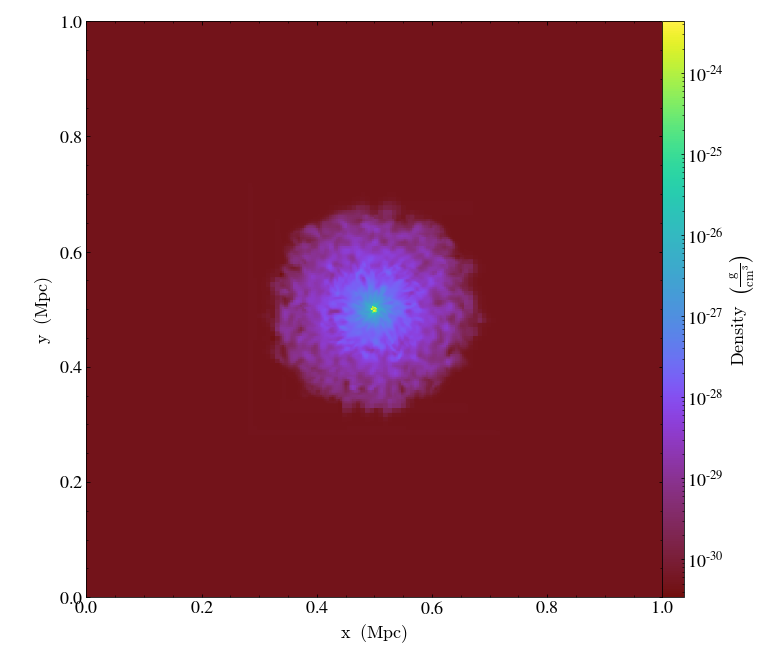

In [34]:
p = ds.r[:, :, 0.5].plot("density")

yt : [INFO     ] 2022-04-24 11:47:00,329 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-24 11:47:00,344 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



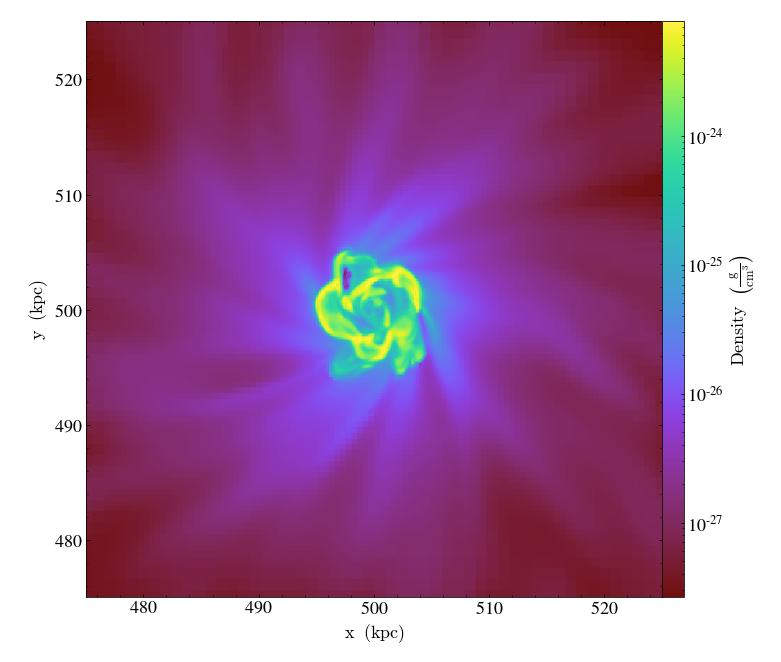

In [35]:
p.zoom(20)

In [36]:
myImage = p.frb # fixed resoltuion binary

We can then grab a simple image array:

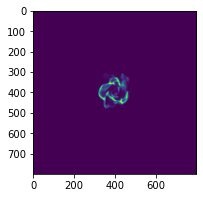

In [37]:
plt.imshow(np.array(myImage['density']))

... or we can turn off labels and grab a lovely image:

yt : [INFO     ] 2022-04-24 11:47:02,908 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:47:02,909 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-24 11:47:02,911 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-24 11:47:02,954 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



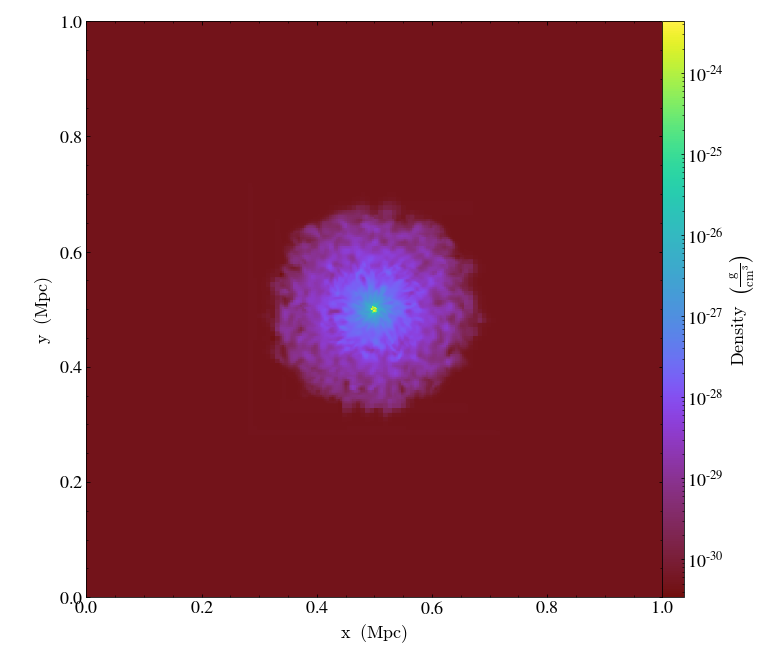

yt : [INFO     ] 2022-04-24 11:47:03,244 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-04-24 11:47:03,250 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



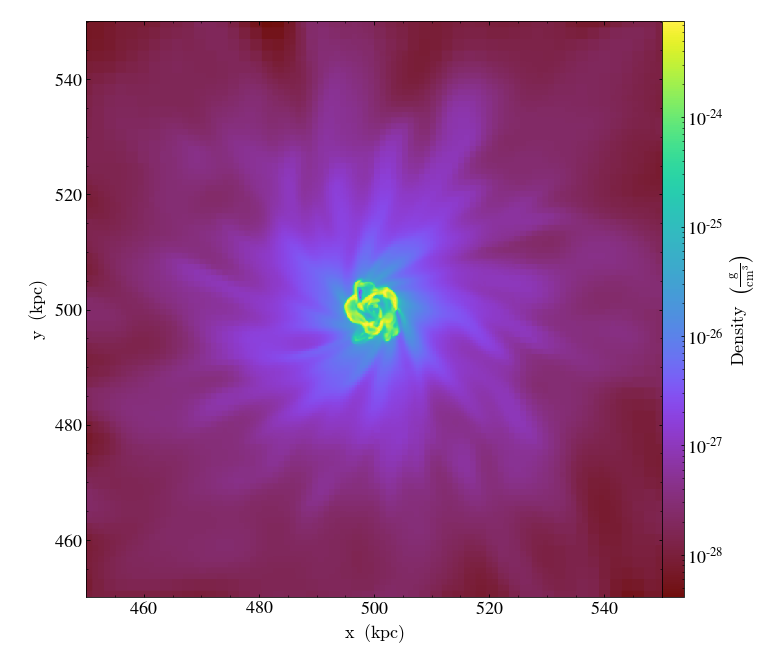

In [38]:
p = ds.r[:, :, 0.5].plot("density")
p.zoom(10)

In [39]:
p.hide_colorbar(); p.hide_axes();


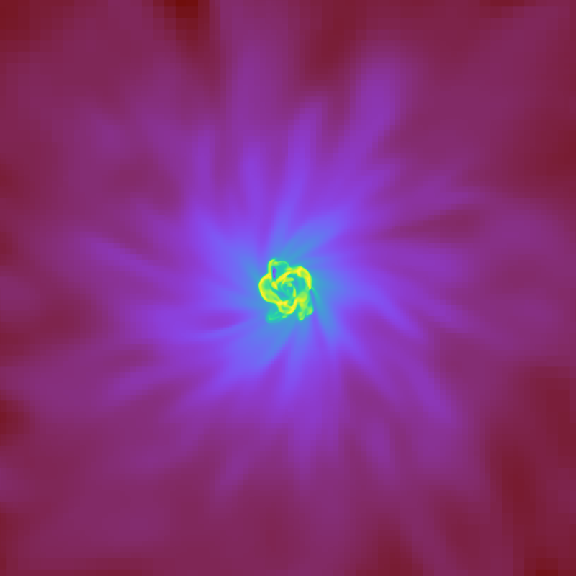

In [40]:
p

Save the image:

In [41]:
p.save('/Users/jnaiman/Downloads/myImage.png')

yt : [INFO     ] 2022-04-24 11:47:08,223 Saving plot /Users/jnaiman/Downloads/myImage.png


['/Users/jnaiman/Downloads/myImage.png']

Now you have a lovely image that you can upload and put on things like sweaters or whatnot.

## Activity #4 Volume rendering with yt

We have 3D data, but so far we've really been looking at 2D representations of this data (modulo the 3D printing type stuff).  We can also make use of [yt's volume rendering](https://yt-project.org/doc/visualizing/volume_rendering.html) interfaces.

Let's make a volume render of the variable `density` in our dataset:

In [42]:
sc = yt.create_scene(ds, 'density')

We can check out `sc` and see that it tells us a bit about how the scene is setup, like that there is this camera object thing and where it is pointing:

In [43]:
print(sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm cm, left_edge=[0. 0. 0.] cm cm, right_edge=[3.086e+24 3.086e+24 3.086e+24] cm cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[1.5 1.5 1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-866025.33679714 -866025.33679714 -866025.33679714] code_length


Let's take a quick look:

yt : [INFO     ] 2022-04-24 11:51:07,527 Rendering scene (Can take a while).
yt : [INFO     ] 2022-04-24 11:51:07,533 Creating volume
yt : [INFO     ] 2022-04-24 11:51:09,845 Creating transfer function
yt : [INFO     ] 2022-04-24 11:51:09,845 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


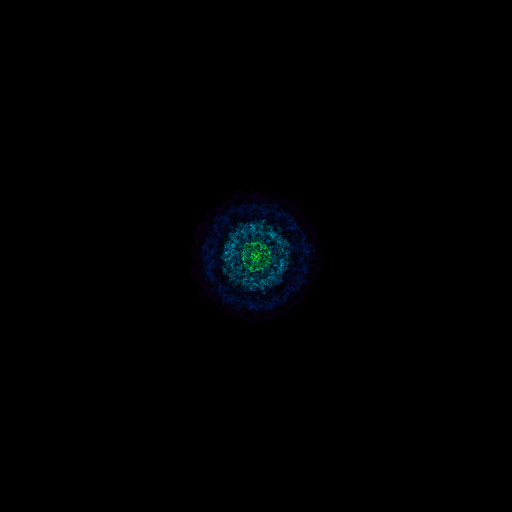

In [44]:
sc.show()

Neat, but let's also zoom in by changing the width of the image:

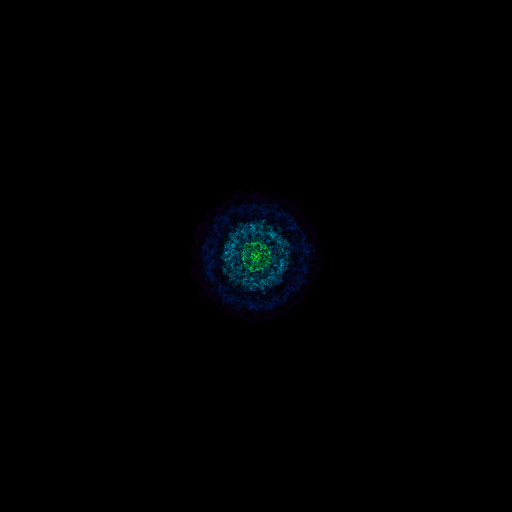

In [45]:
sc.camera.width = (300, 'kpc')
sc.show()

Hey what happened? We have to explicitly change the orientation of the camera (think of this sort of like a call-back):

In [46]:
sc.camera.switch_orientation?

Let's re-start from the beginning:

yt : [INFO     ] 2022-04-24 11:52:19,210 Rendering scene (Can take a while).
yt : [INFO     ] 2022-04-24 11:52:19,212 Creating volume
yt : [INFO     ] 2022-04-24 11:52:21,041 Creating transfer function
yt : [INFO     ] 2022-04-24 11:52:21,042 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


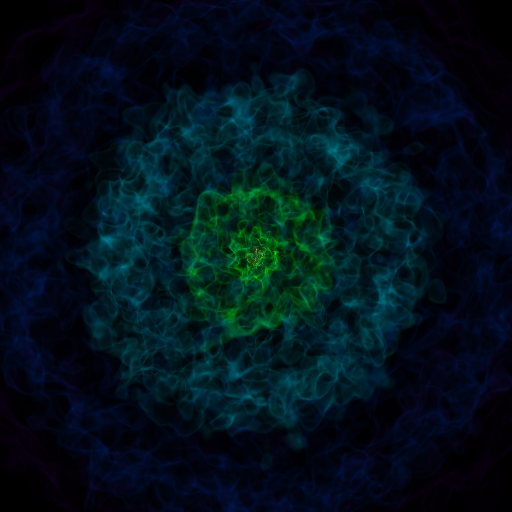

In [47]:
sc = yt.create_scene(ds, 'density')
sc.camera.width = (300, 'kpc')
sc.camera.switch_orientation()
sc.show()

We can also do this with the brain scan dataset.

Get our brain-scan data with yt + h5py like before:

**skip this if already loaded!**

In [48]:
with h5py.File("/Users/jnaiman/Downloads/single_dicom.h5", "r") as f:
    scan_data = f["/scan"][:]

In [49]:
scan_data.shape

(36, 512, 512)

In [51]:
dsd = yt.load_uniform_grid({'scan': scan_data},
                     [36, 512, 512],
                     ##length_unit = yt.units.cm, # specify the units of this dataset
                     bbox = np.array([[0., 10], [0, 10], [0, 10]]), # give a "size" to this dataset
                          )

yt : [INFO     ] 2022-04-24 11:53:31,401 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-24 11:53:31,402 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2022-04-24 11:53:31,403 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-24 11:53:31,404 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2022-04-24 11:53:31,405 Parameters: cosmological_simulation   = 0


Let's recall there is only 1 field in there when we load data this way:

In [52]:
dsd.field_list

[('stream', 'scan')]

Recall, we can make some quick plots:

yt : [INFO     ] 2022-04-24 11:54:00,434 Rendering scene (Can take a while).
yt : [INFO     ] 2022-04-24 11:54:00,435 Creating volume
/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/unyt/array.py:1674: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
yt : [INFO     ] 2022-04-24 11:54:00,852 Creating transfer function
yt : [INFO     ] 2022-04-24 11:54:00,852 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


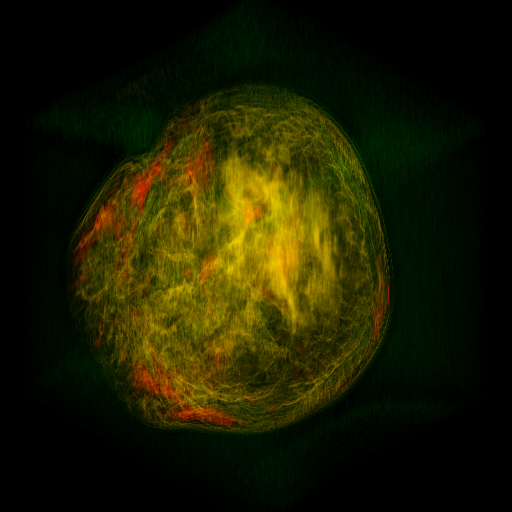

In [53]:
sc = yt.create_scene(dsd, 'scan')
sc.show()

That's ok, but the camera location doesn't look as great. Let's move it!

In [54]:
sc.camera

<Camera Object>:
	position:[10. 10. 10.] code_length
	focus:[5. 5. 5.] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[15. 15. 15.] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-8660253.36797141 -8660253.36797141 -8660253.36797141] code_length

Let's start over and look at this scan "face on":

yt : [INFO     ] 2022-04-24 11:54:47,587 Rendering scene (Can take a while).
yt : [INFO     ] 2022-04-24 11:54:47,588 Creating volume
yt : [INFO     ] 2022-04-24 11:54:47,835 Creating transfer function
yt : [INFO     ] 2022-04-24 11:54:47,836 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


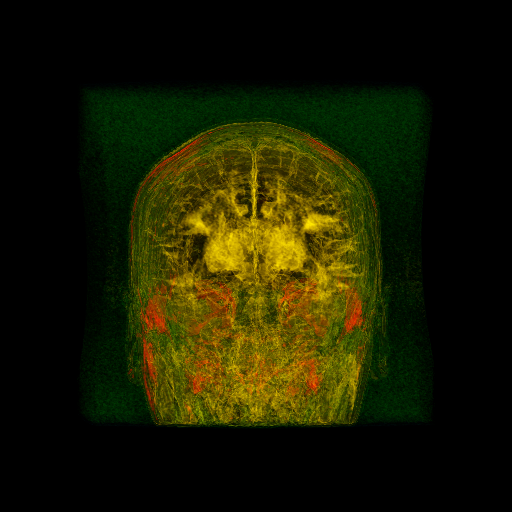

In [55]:
sc = yt.create_scene(dsd, 'scan')
sc.camera.position = [10, 0, 0] # placement
sc.camera.north_vector = [0,-1,0] # orientation of "up"
sc.camera.switch_orientation()
sc.show()

## Interactive volume rendering with ipyvolume

Finally, let's use `ipyvolume` to make an interactive volume rendering:

In [57]:
import ipyvolume

In [58]:
ipyvolume.figure()
ipyvolume.volshow(scan_data)#, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
ipyvolume.show()

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipyvolume/widgets.py:241: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipyvolume/utils.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2]) / 2
/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipyvolume/serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.s

Technically, there is only a density that we are plotting here, so we can plot just one level (note, all 3 widgets show up but they don't do anything).

In [59]:
ipyvolume.volshow?

In [60]:
ipyvolume.figure()
ipyvolume.volshow(scan_data, level=[0.25])
ipyvolume.show()

Finally, note that there is a whole repository of (mostly) astronomy data on the yt repository!

See data repo link here: https://yt-project.org/data/